# Loan Default Prediction

In [1]:
# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_bqCt9Pv.csv")

In [3]:
df = train

In [4]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
# Counting the null values in the train set.
print(df.isnull().sum())

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [6]:
# Finding Unique values
print(df.nunique())

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [7]:
df.shape

(233154, 41)

In [8]:
test.describe()
df1 = test

We can infer that the Employment.Type column contains more than 7000 NaN values so it should be dropped.

In [9]:
df1.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [10]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


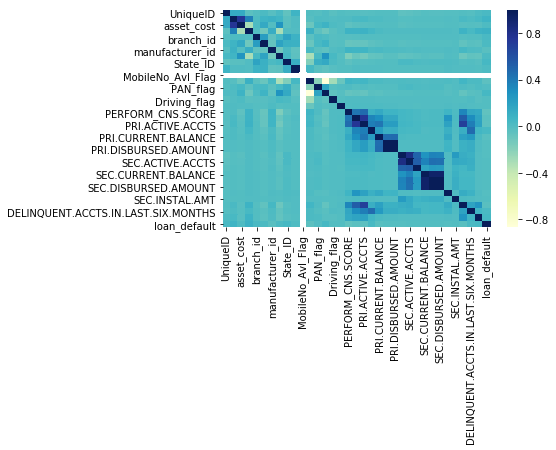

In [11]:
# Finding correlation between the columns
corr = df.corr()
sns.heatmap(corr,cmap="YlGnBu")

There are many things visible in this plot.
1. MobileNo_Avl_flag does not deal with anything.
2. 'disbursed_amount'and 'asset_cost' are 75% correlated.
etc..
Removing the columns

In [12]:
# Dealing with the dates. Extracting Features.
df['Average_acct_years'] = df['AVERAGE.ACCT.AGE'].str.split(' ').str[0].str.extract('(\d+)').astype(int)

df['CREDIT.HISTORY_years'] = df['CREDIT.HISTORY.LENGTH'].str.split(' ').str[0].str.extract('(\d+)').astype(int)
df['CREDIT.HISTORY_months'] = df['CREDIT.HISTORY.LENGTH'].str.split(' ').str[1].str.extract('(\d+)').astype(int)

df['Date.of.Birth'] =  pd.to_datetime(df['Date.of.Birth'])
df['DisbursalDate'] =  pd.to_datetime(df['DisbursalDate'])
df['Date.of.Birth_year']= df['Date.of.Birth'].dt.year
df['DisbursalDate_month']= df['DisbursalDate'].dt.month
df['DisbursalDate_day']= df['DisbursalDate'].dt.day

#df['CREDIT.HISTORY_months'] = 12*df['CREDIT.HISTORY_years'] + df['CREDIT.HISTORY_months']


In [13]:

df1['Average_acct_years'] = df1['AVERAGE.ACCT.AGE'].str.split(' ').str[0].str.extract('(\d+)').astype(int)

df1['CREDIT.HISTORY_years'] = df1['CREDIT.HISTORY.LENGTH'].str.split(' ').str[0].str.extract('(\d+)').astype(int)
df1['CREDIT.HISTORY_months'] = df1['CREDIT.HISTORY.LENGTH'].str.split(' ').str[1].str.extract('(\d+)').astype(int)

df1['Date.of.Birth'] =  pd.to_datetime(df1['Date.of.Birth'])
df1['DisbursalDate'] =  pd.to_datetime(df1['DisbursalDate'])
df1['Date.of.Birth_year']= df1['Date.of.Birth'].dt.year
df1['DisbursalDate_month']= df1['DisbursalDate'].dt.month
df1['DisbursalDate_day']= df1['DisbursalDate'].dt.day


In [14]:
# Droping not useful columns.
cols = ['disbursed_amount','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT',
        'PRI.ACTIVE.ACCTS','SEC.NO.OF.ACCTS','PRI.OVERDUE.ACCTS','Employment.Type',
        'PRI.DISBURSED.AMOUNT','SEC.OVERDUE.ACCTS','Employee_code_ID',
        'Date.of.Birth','DisbursalDate','MobileNo_Avl_Flag','Driving_flag',
        'Passport_flag','CREDIT.HISTORY.LENGTH','AVERAGE.ACCT.AGE',
        'SEC.CURRENT.BALANCE','NO.OF_INQUIRIES'
       ]
for col in cols:
    df = df.drop([col], axis =1)
    df1 = df1.drop([col], axis =1)

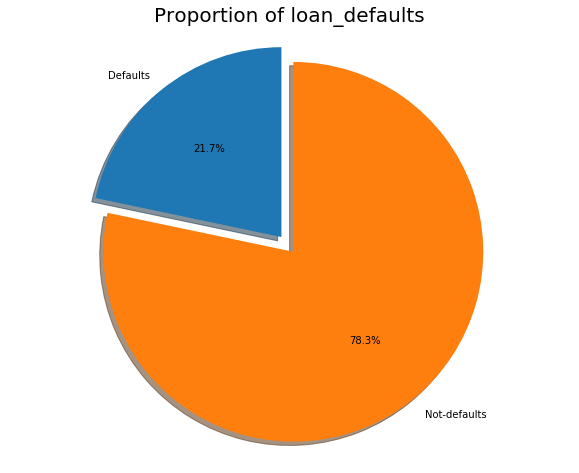

In [15]:
labels = 'Defaults', 'Not-defaults'
sizes = [df.loan_default[df['loan_default']==1].count(), df.loan_default[df['loan_default']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of loan_defaults", size = 20)
plt.show()

This is a class imbalance problem with # 21.7 % defaulters.

In [16]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

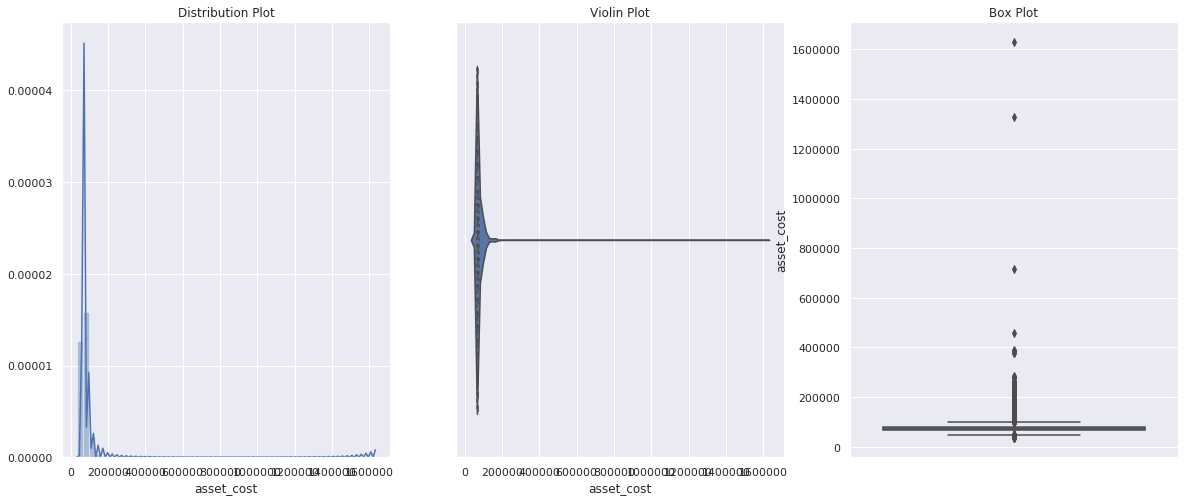

In [17]:
univariate(df=df,col='asset_cost',vartype=0)

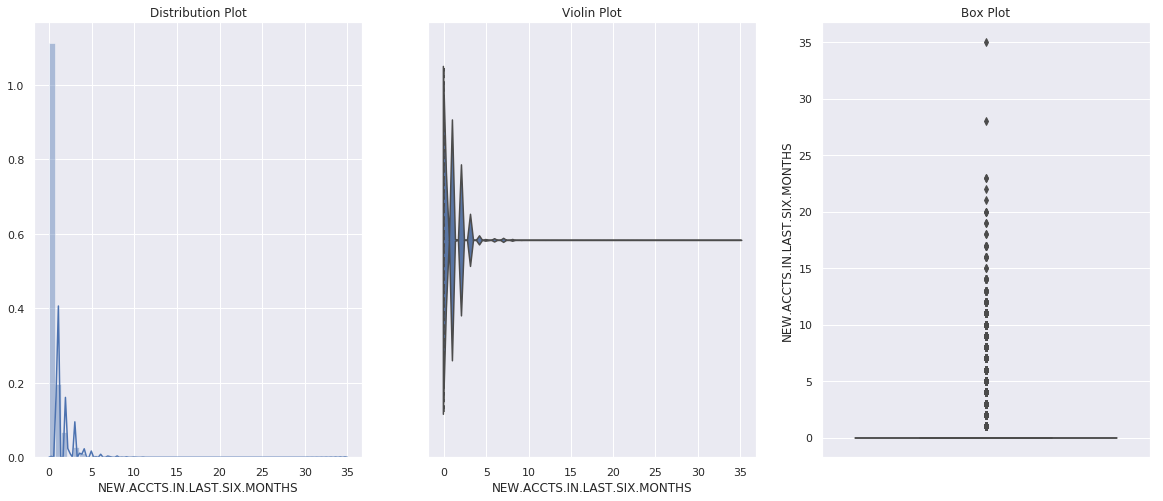

In [18]:
univariate(df=df,col='NEW.ACCTS.IN.LAST.SIX.MONTHS',vartype=0)

In [19]:
df['asset_cost'] = df['asset_cost'].clip(np.percentile(df['asset_cost'],0),np.percentile(df['asset_cost'],90))
df['ltv'] = df['ltv'].clip(np.percentile(df['ltv'],2),np.percentile(df['ltv'],100))
df['PRI.NO.OF.ACCTS'] = df['PRI.NO.OF.ACCTS'].clip(np.percentile(df['PRI.NO.OF.ACCTS'],0),np.percentile(df['PRI.NO.OF.ACCTS'],99))

df1['asset_cost'] = df1['asset_cost'].clip(np.percentile(df1['asset_cost'],0),np.percentile(df1['asset_cost'],90))
df1['ltv'] = df1['ltv'].clip(np.percentile(df1['ltv'],2),np.percentile(df1['ltv'],100))
df1['PRI.NO.OF.ACCTS'] = df1['PRI.NO.OF.ACCTS'].clip(np.percentile(df1['PRI.NO.OF.ACCTS'],0),np.percentile(df1['PRI.NO.OF.ACCTS'],99))


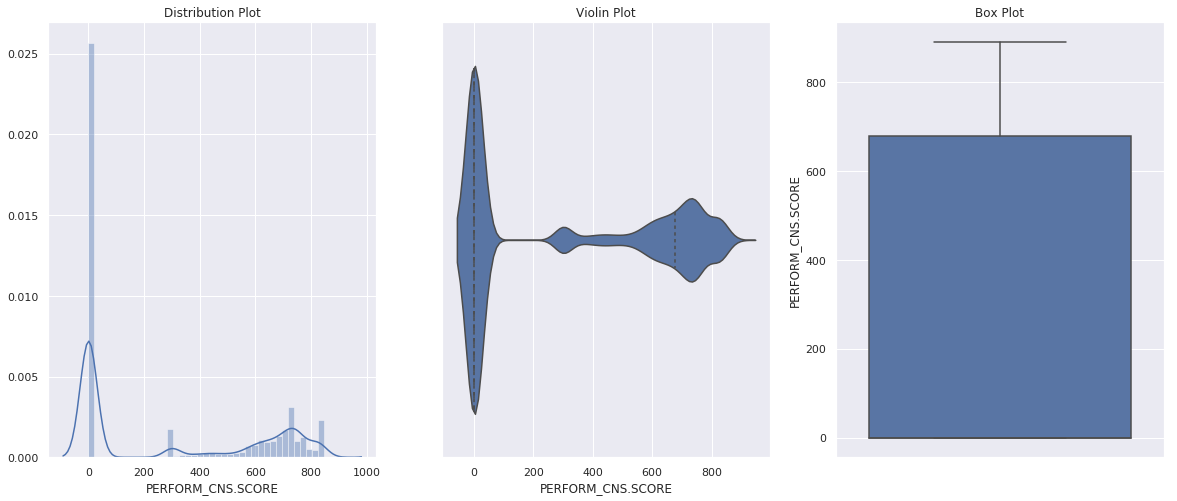

In [20]:
univariate(df=df,col='PERFORM_CNS.SCORE',vartype=0)

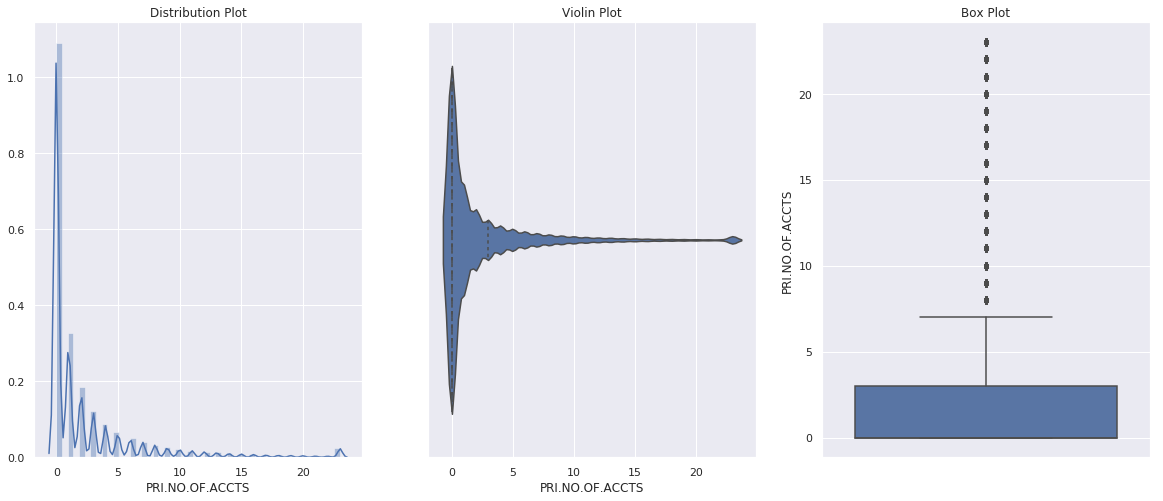

In [21]:
univariate(df=df,col='PRI.NO.OF.ACCTS',vartype=0)

In [22]:
df.columns


Index(['UniqueID', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'SEC.ACTIVE.ACCTS',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'loan_default',
       'Average_acct_years', 'CREDIT.HISTORY_years', 'CREDIT.HISTORY_months',
       'Date.of.Birth_year', 'DisbursalDate_month', 'DisbursalDate_day'],
      dtype='object')

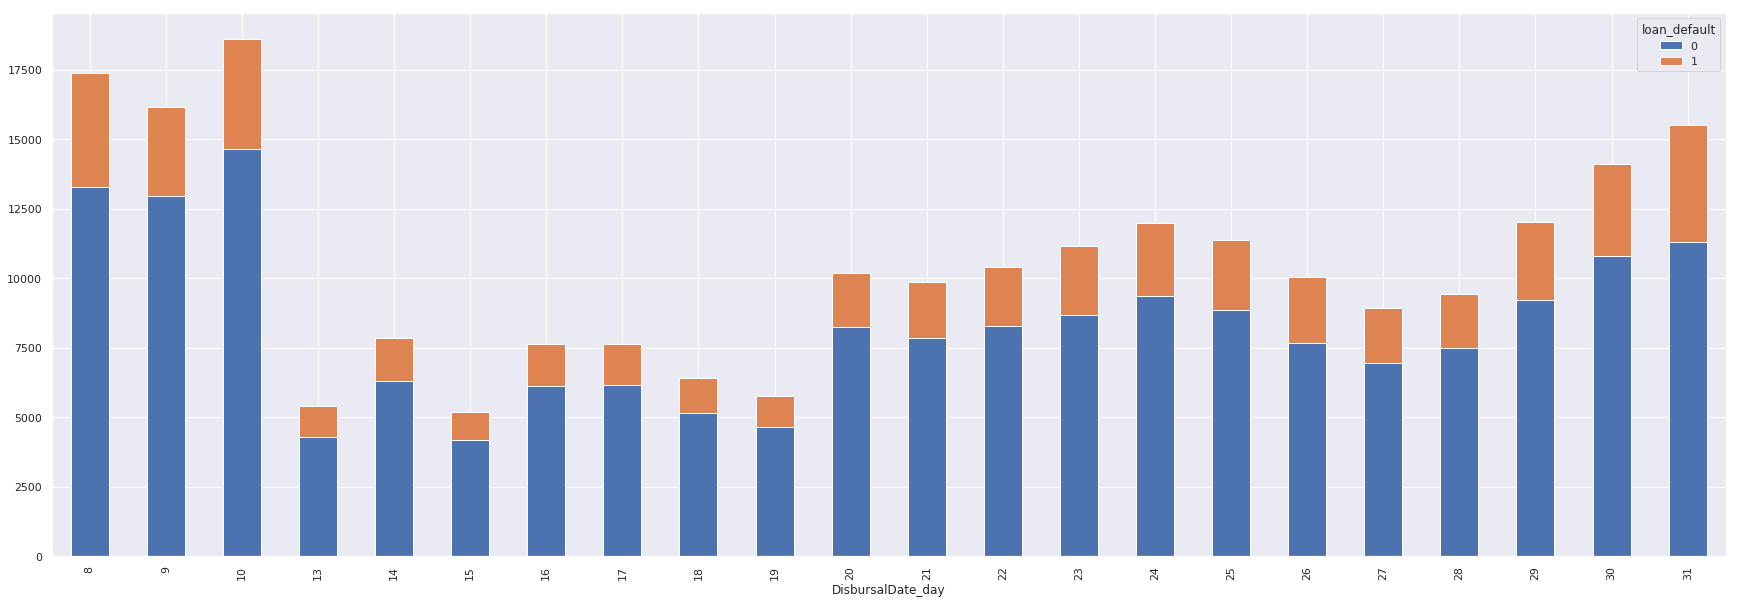

In [23]:
df.groupby(["DisbursalDate_day", "loan_default"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

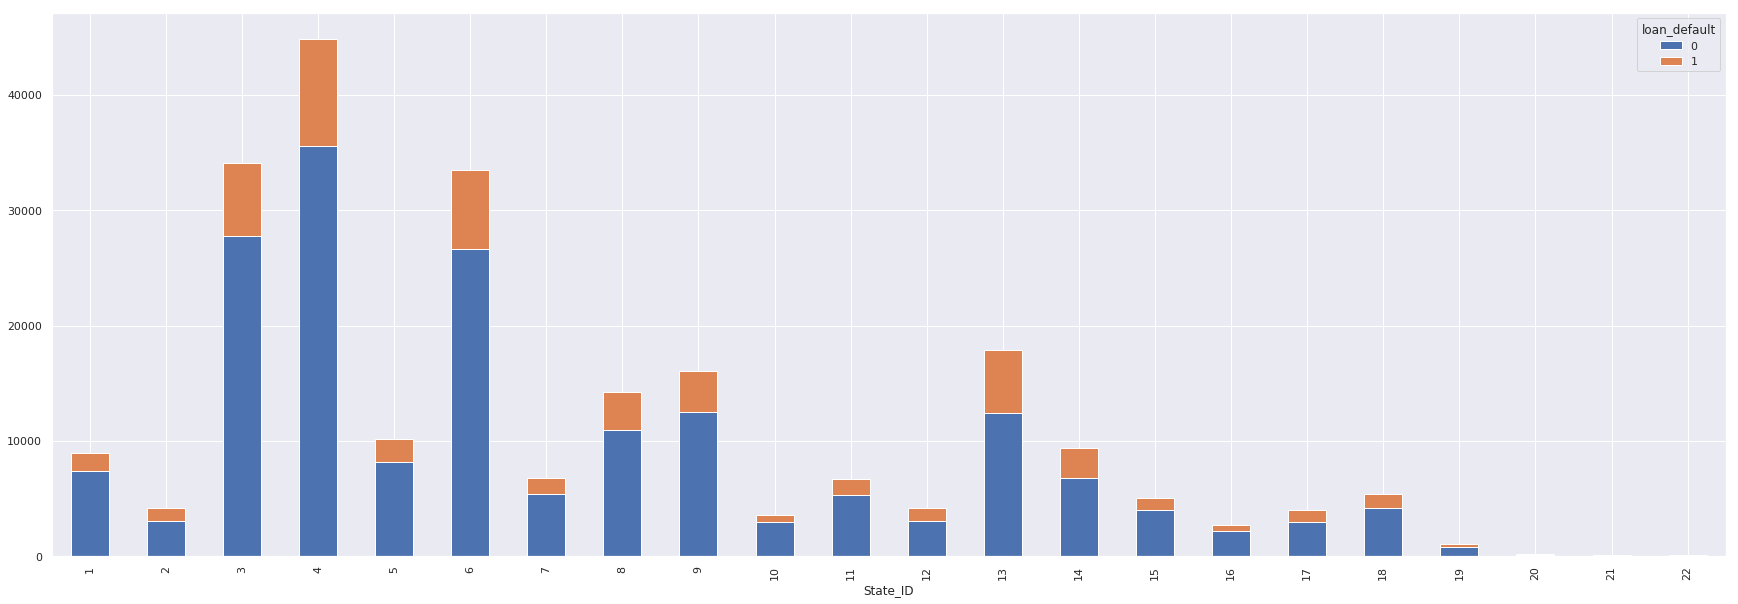

In [24]:
df.groupby(["State_ID", "loan_default"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['PERFORM_CNS.SCORE.DESCRIPTION'] = le.fit_transform(df['PERFORM_CNS.SCORE.DESCRIPTION'])
df1['PERFORM_CNS.SCORE.DESCRIPTION'] = le.fit_transform(df1['PERFORM_CNS.SCORE.DESCRIPTION'])


In [26]:
df = df.drop(['UniqueID'], axis =1)  
df1 = df1.drop(['UniqueID'], axis =1)  
X = df.drop(['loan_default'],axis=1)
y = df['loan_default']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20 ,random_state = 200)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/dhiraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/dhiraj/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/dhiraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [28]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=20)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [29]:
eval_set=[(X_test, y_test)]

import xgboost
clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.2, 
    seed=21234,  
    random_state = 20,
    max_depth=15, 
    gamma=10,
    
    n_estimators=500,
    )

clf.fit(X_resampled, y_resampled, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)


[0]	validation_0-auc:0.615316
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.628538
[2]	validation_0-auc:0.632417
[3]	validation_0-auc:0.636323
[4]	validation_0-auc:0.638606
[5]	validation_0-auc:0.640535
[6]	validation_0-auc:0.641914
[7]	validation_0-auc:0.643449
[8]	validation_0-auc:0.644818
[9]	validation_0-auc:0.645869
[10]	validation_0-auc:0.646939
[11]	validation_0-auc:0.647427
[12]	validation_0-auc:0.647821
[13]	validation_0-auc:0.648171
[14]	validation_0-auc:0.64817
[15]	validation_0-auc:0.648951
[16]	validation_0-auc:0.649317
[17]	validation_0-auc:0.649863
[18]	validation_0-auc:0.650636
[19]	validation_0-auc:0.65087
[20]	validation_0-auc:0.651293
[21]	validation_0-auc:0.651527
[22]	validation_0-auc:0.651798
[23]	validation_0-auc:0.651785
[24]	validation_0-auc:0.652072
[25]	validation_0-auc:0.652253
[26]	validation_0-auc:0.652593
[27]	validation_0-auc:0.652638
[28]	validation_0-auc:0.65262
[29]	validation_0-auc:0.652681
[30]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=10, learning_rate=0.2, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=20, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=21234, silent=True, subsample=1)

In [30]:
# Evaluation Metrix here is roc-auc score.
y_pred = clf.predict(X_test)

print(roc_auc_score(y_test,y_pred))


0.6121617734218623


In [32]:

submission = clf.predict(df1)
pd.DataFrame({"UniqueID":test.UniqueID , "loan_default": submission}).to_csv('output2.csv',index=False)
